In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial.distance import *

sc.settings.set_figure_params(dpi=80)
import os

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [71]:
slideseq_puck_tissue_map = {
    'coronal hippocampus':['180413_7','180413_7','180413_7'],
    'coronal cerebellum':['180430_1','180430_6','180430_1','180430_5','180430_6','180430_1',
                         '180430_5','180430_6','180430_1','180430_1','180430_5','180430_6',
                         '180430_6'],
    'kidney':['180528_23','180528_23'],
    'liver':['180803_8','180803_8'],
#     'coronal olfactory bulb':['180430_3','180430_3'], nodata
    'sagittal cerebellum':['180819_9','180819_10','180819_11','180819_12','180819_9','180819_10',
                          '180819_11','180819_12','180819_24','180819_26','180819_30','180821_8',
                          '180821_9','180821_12','180819_12',],
    'sagittal hippocampus':['180528_20','180528_22','180531_13','180531_16','180531_17','180531_18',
                           '180531_19','180531_22','180531_23','180602_15','180602_16','180602_17',
                           '180602_18','180602_20','180602_22','180602_23','180602_24',
                           '180611_1','180611_2','180611_6','180620_4','180531_17','180602_20',
                           '180531_13','180531_22','180602_17','180602_20','180611_6','180611_10',
                           '180611_11','180611_12','180611_13','180611_14','180611_16','180611_3',
                           '180611_4','180611_5','180611_7','180611_8','180611_9','180615_1','180615_10',
                           '180615_11','180615_12','180615_14','180615_16','180615_17','180615_18','180615_20',
                           '180615_21','180615_22','180615_3','180615_4','180615_5','180615_6','180615_7',
                           '180615_8','180618_12','180618_13','180618_14','180618_15','180618_16',
                           '180618_18','180618_20','180618_21','180618_24','180618_3','180618_4','180618_7',
                           '180620_1','180620_3','180620_5'],
    'coronal cortex':['180819_3'],
    'sagittal cortex':['180819_19','180819_6','180819_19','180819_6','180819_5','180819_6','180819_7',
                      '180819_19','180821_3','180819_19','180819_6','180819_5','180819_6'],
    'coronal cortex 2h':['180819_1','180819_2','180819_3','180819_4'],
    'sagittal cortex 2h':['180819_13','180819_14','180728_15'],
    'sagittal cortex 3d':['180819_16','180819_18','180819_19','180821_3'],
    'sagittal cortex 2w':['180819_5','180819_6','180819_7','180819_8'],
#     'coronal human cerebellum':['180821_27','180821_27','180821_28'], nodata
    
}

In [72]:
all_used_pucks = []
for key in slideseq_puck_tissue_map.keys():
    cur_li = slideseq_puck_tissue_map[key]
    cur_li_unique = list(set(cur_li))
    slideseq_puck_tissue_map[key] = cur_li_unique
    print('{0}:{1}'.format(key,len(cur_li_unique)))
    all_used_pucks.extend(cur_li_unique)

coronal hippocampus:1
coronal cerebellum:3
kidney:1
liver:1
sagittal cerebellum:10
sagittal hippocampus:65
coronal cortex:1
sagittal cortex:5
coronal cortex 2h:4
sagittal cortex 2h:3
sagittal cortex 3d:4
sagittal cortex 2w:4


# Puck_180413_7

In [4]:
root_path = '/home/yzy/PUBDT/st/slideseq/h5ad/'
puck = 'Puck_180413_7.h5ad'
adata = sc.read_h5ad(root_path+puck)

In [5]:
np.sum(adata.var_names.str.startswith("mt-"))

26

In [6]:
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

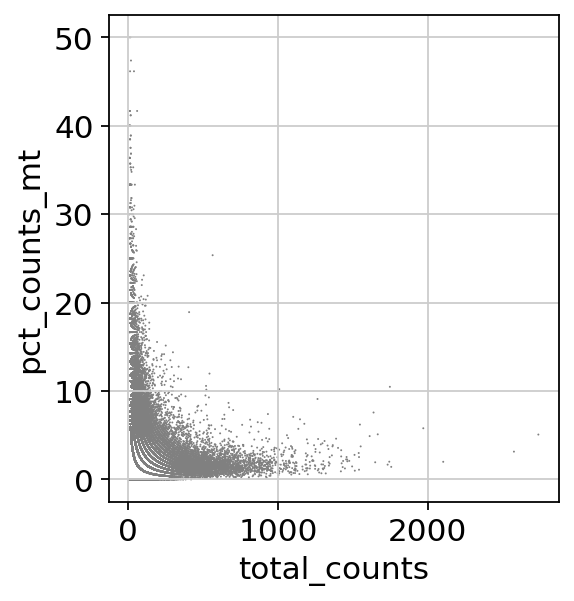

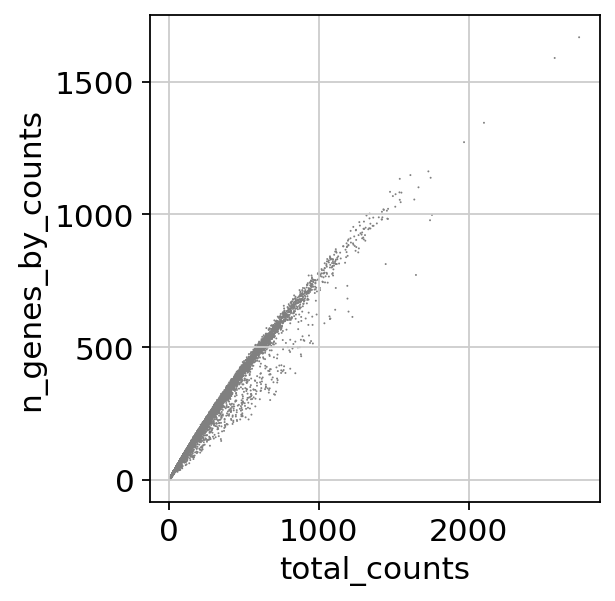

In [7]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [8]:
adata_tmp = adata.copy()

In [20]:
adata = adata_tmp.copy()

In [21]:
sc.pp.filter_cells(adata, min_genes=150)
sc.pp.filter_genes(adata, min_cells=3)

In [22]:
adata

AnnData object with n_obs × n_vars = 9430 × 15589 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    obsm: 'spatial'

In [25]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)
# sc.pp.highly_variable_genes(adata, n_top_genes=1000)



sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

# sc.pl.embedding(adata,basis='spatial',color=['clusters'])


/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../anaconda3/envs/scaden/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


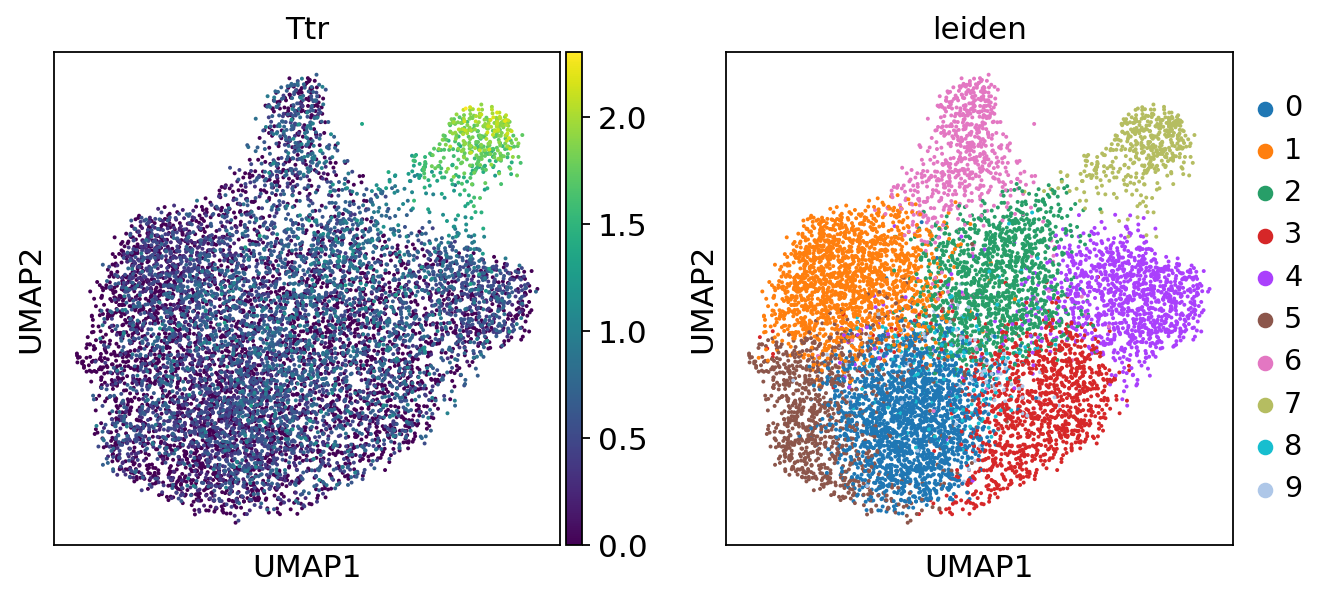

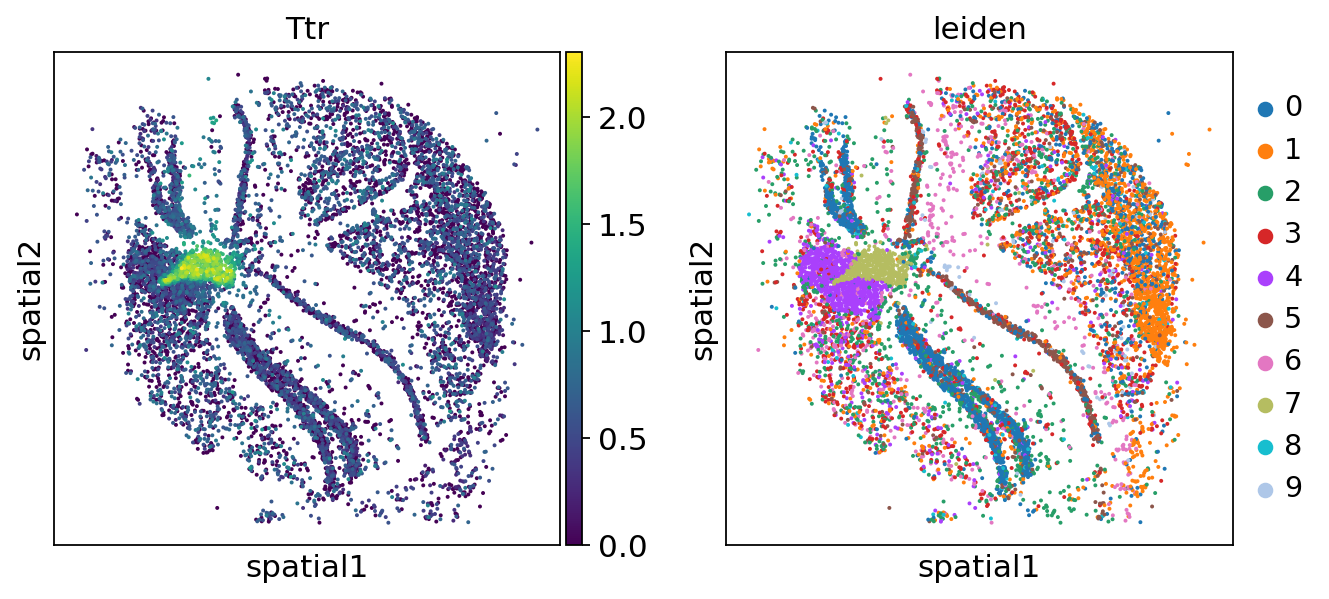

In [26]:
sc.pl.umap(adata,color=['Ttr','leiden'])
sc.pl.embedding(adata,basis='spatial',color=['Ttr','leiden'])


# 180611_2

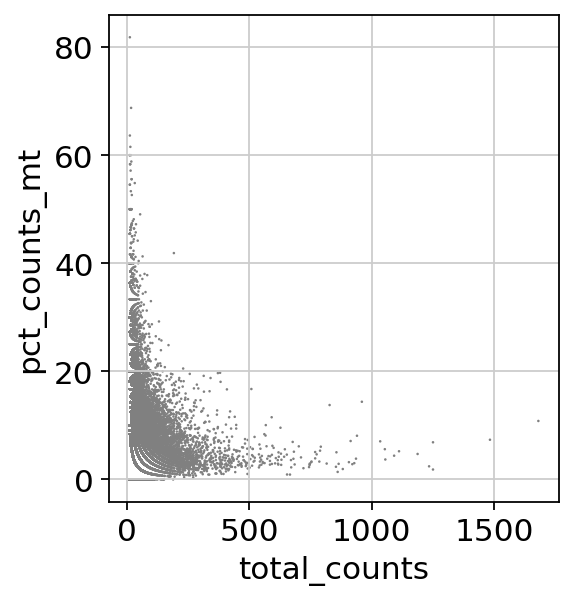

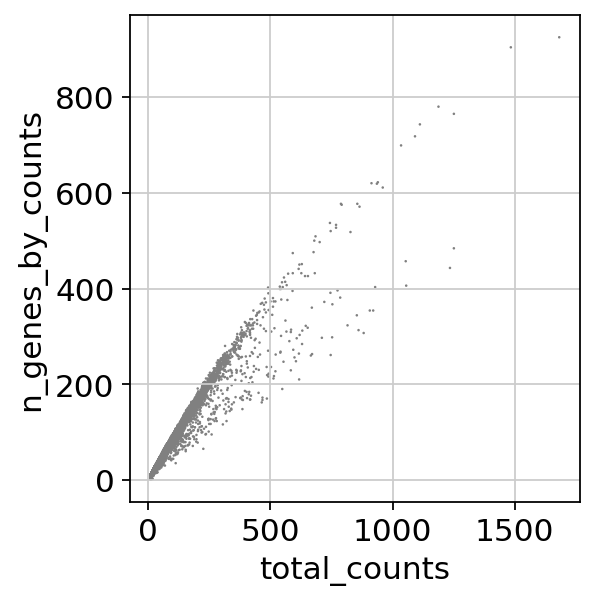

In [27]:
root_path = '/home/yzy/PUBDT/st/slideseq/h5ad/'
puck = 'Puck_180611_2.h5ad'
adata = sc.read_h5ad(root_path+puck)

np.sum(adata.var_names.str.startswith("mt-"))

adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [28]:
adata_tmp = adata.copy()

In [37]:
adata = adata_tmp.copy()

In [41]:
adata

AnnData object with n_obs × n_vars = 22290 × 13069 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [33]:
adata

AnnData object with n_obs × n_vars = 22946 × 17361 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'

In [42]:
sc.pp.filter_cells(adata, min_genes=50)
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)
# sc.pp.highly_variable_genes(adata, n_top_genes=1000)



sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

# sc.pl.embedding(adata,basis='spatial',color=['clusters'])


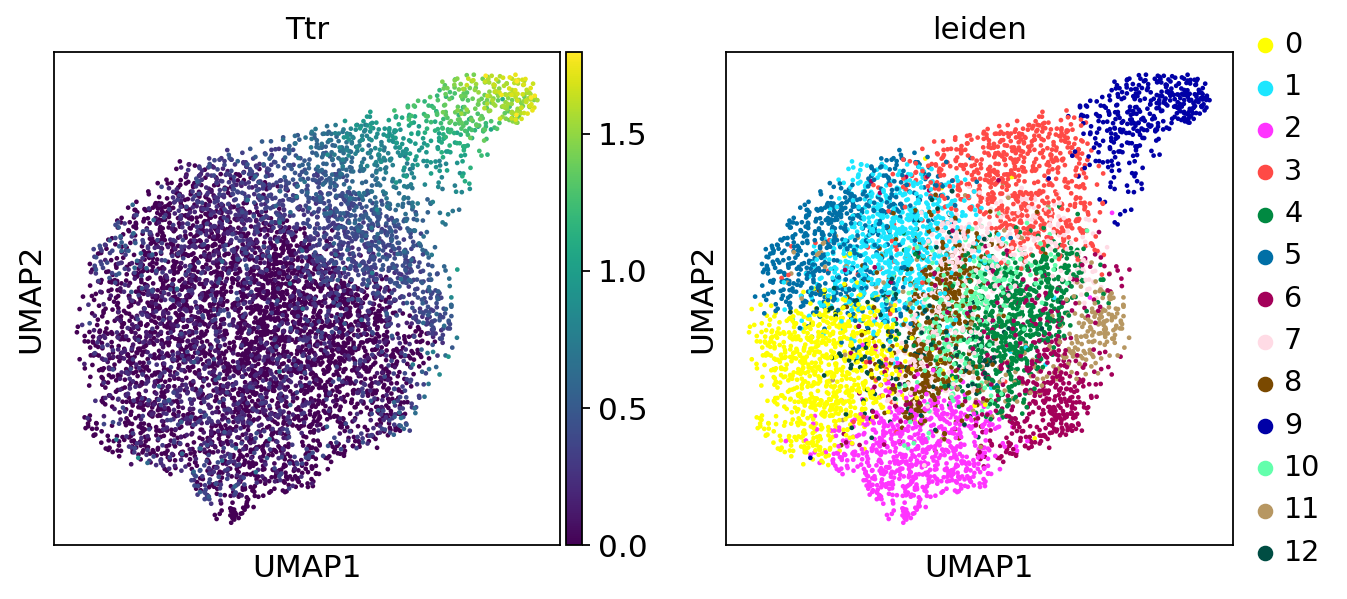

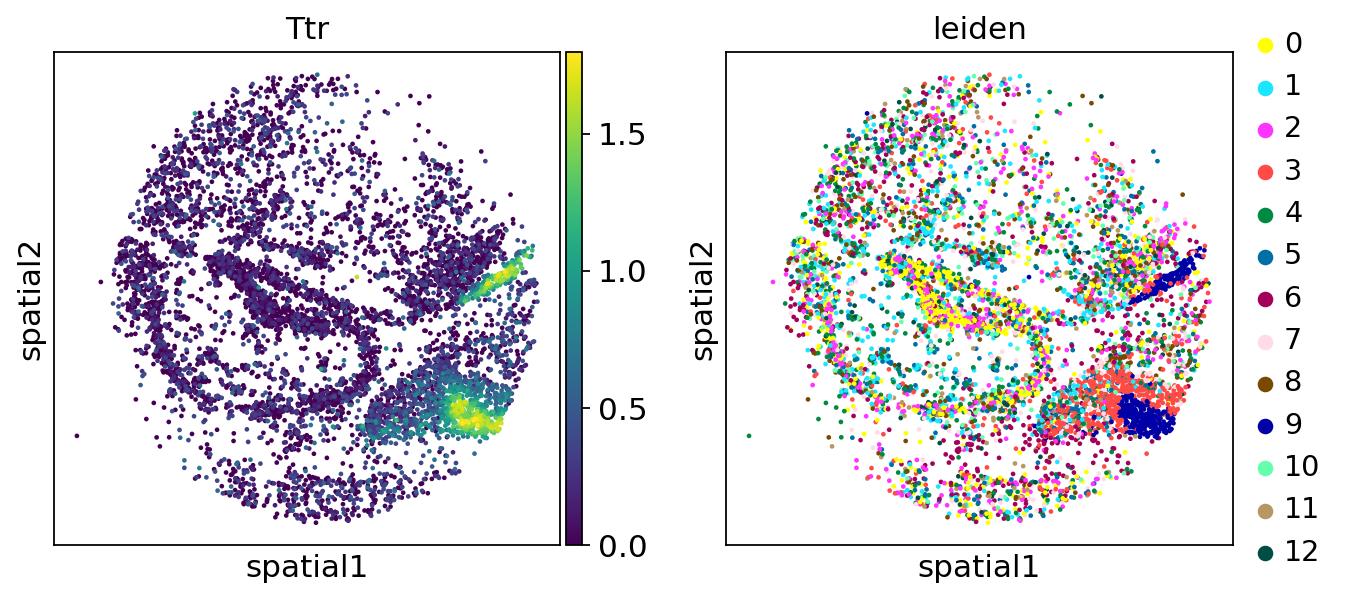

In [43]:
sc.pl.umap(adata,color=['Ttr','leiden'])
sc.pl.embedding(adata,basis='spatial',color=['Ttr','leiden'])


In [76]:
all_used_pucks = []
for key in slideseq_puck_tissue_map.keys():
    cur_li = slideseq_puck_tissue_map[key]
    cur_li_unique = list(set(cur_li))
    slideseq_puck_tissue_map[key] = cur_li_unique
    print('{0}:{1}'.format(key,len(cur_li_unique)))
    all_used_pucks.extend(cur_li_unique)

coronal hippocampus:1
coronal cerebellum:3
kidney:1
liver:1
sagittal cerebellum:10
sagittal hippocampus:65
coronal cortex:1
sagittal cortex:5
coronal cortex 2h:4
sagittal cortex 2h:3
sagittal cortex 3d:4
sagittal cortex 2w:4


# coronal cerebellum

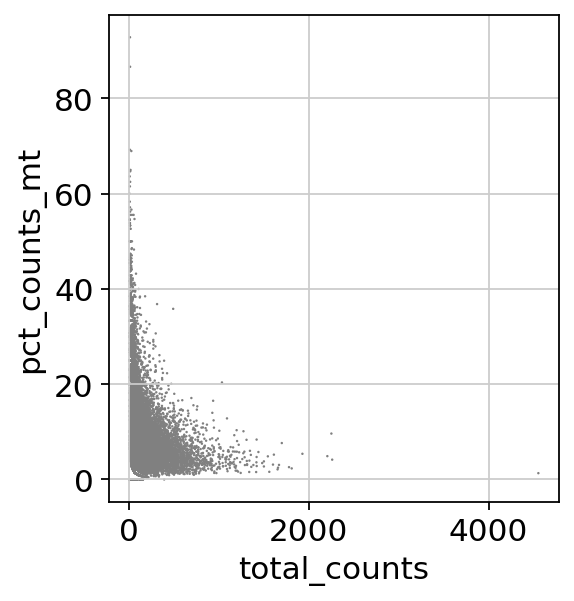

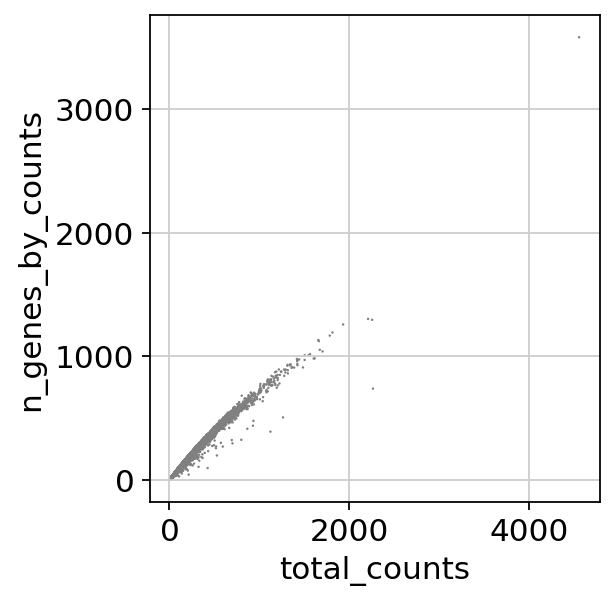

In [90]:
root_path = '/home/yzy/PUBDT/st/slideseq/h5ad/'
# puck = 'Puck_180611_2.h5ad'
puck = 'Puck_{0}.h5ad'.format(slideseq_puck_tissue_map['coronal cerebellum'][1])
adata = sc.read_h5ad(root_path+puck)

np.sum(adata.var_names.str.startswith("mt-"))

adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [91]:
adata_tmp = adata.copy()

In [92]:
adata

AnnData object with n_obs × n_vars = 24847 × 18906 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'

In [93]:
sc.pp.filter_cells(adata, min_genes=50)
sc.pp.filter_genes(adata, min_cells=3)

In [94]:
adata

AnnData object with n_obs × n_vars = 14984 × 15019 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    obsm: 'spatial'

In [95]:


sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)
# sc.pp.highly_variable_genes(adata, n_top_genes=1000)



sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

# sc.pl.embedding(adata,basis='spatial',color=['clusters'])
sc.pl.umap(adata,color=['Ttr','leiden'])
sc.pl.embedding(adata,basis='spatial',color=['Ttr','leiden'])


/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../anaconda3/envs/scaden/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


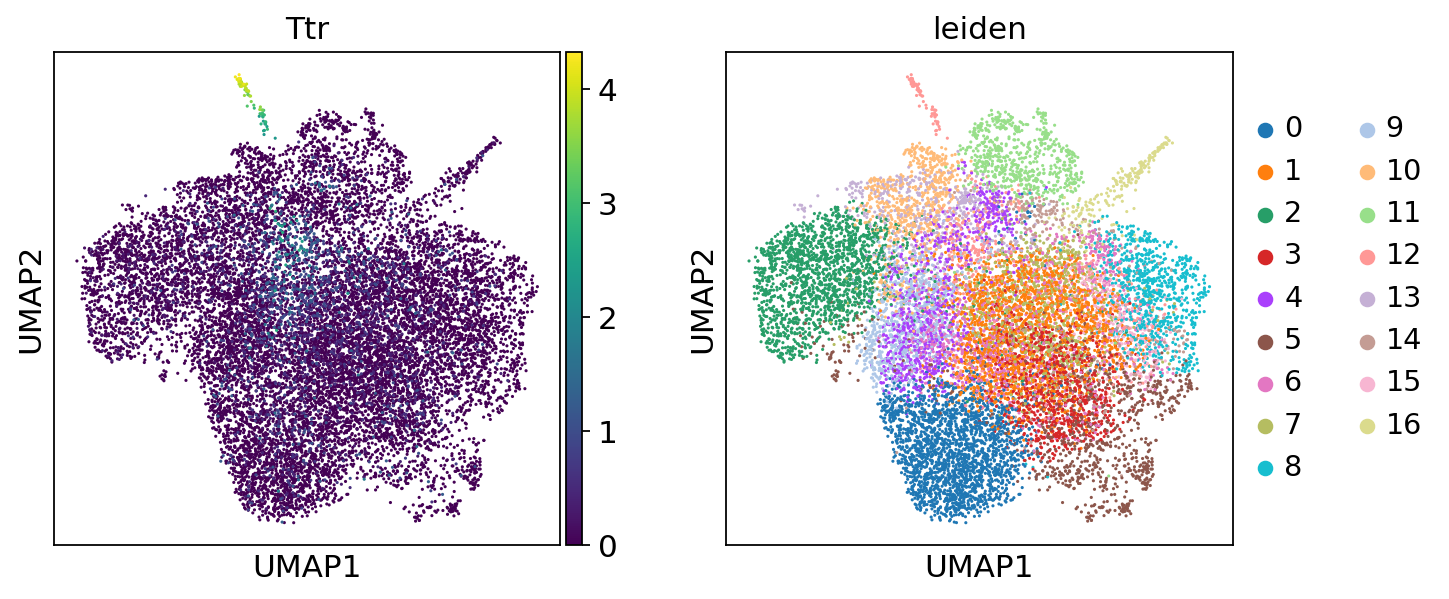

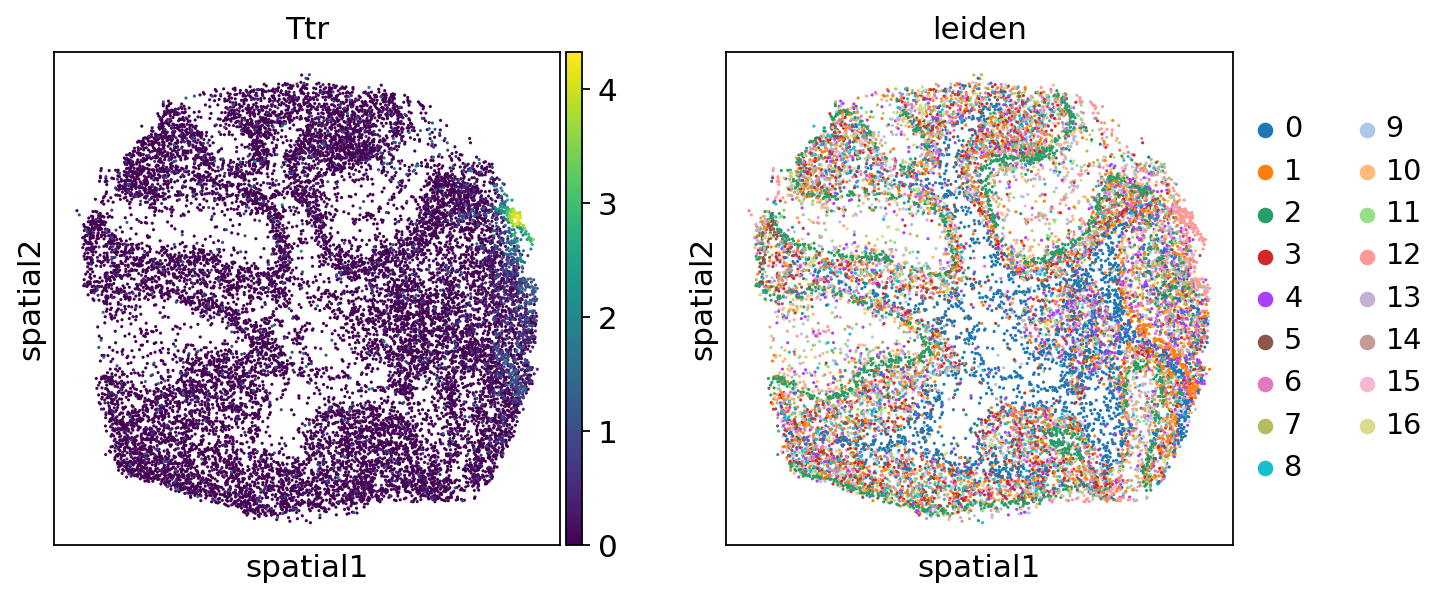

In [96]:
sc.pl.umap(adata,color=['Ttr','leiden'])
sc.pl.embedding(adata,basis='spatial',color=['Ttr','leiden'])


# coronal cortex

In [125]:
all_used_pucks = []
for key in slideseq_puck_tissue_map.keys():
    cur_li = slideseq_puck_tissue_map[key]
    cur_li_unique = list(set(cur_li))
    slideseq_puck_tissue_map[key] = cur_li_unique
    print('{0}:{1}'.format(key,len(cur_li_unique)))
    all_used_pucks.extend(cur_li_unique)

coronal hippocampus:1
coronal cerebellum:3
kidney:1
liver:1
sagittal cerebellum:10
sagittal hippocampus:65
coronal cortex:1
sagittal cortex:5
coronal cortex 2h:4
sagittal cortex 2h:3
sagittal cortex 3d:4
sagittal cortex 2w:4


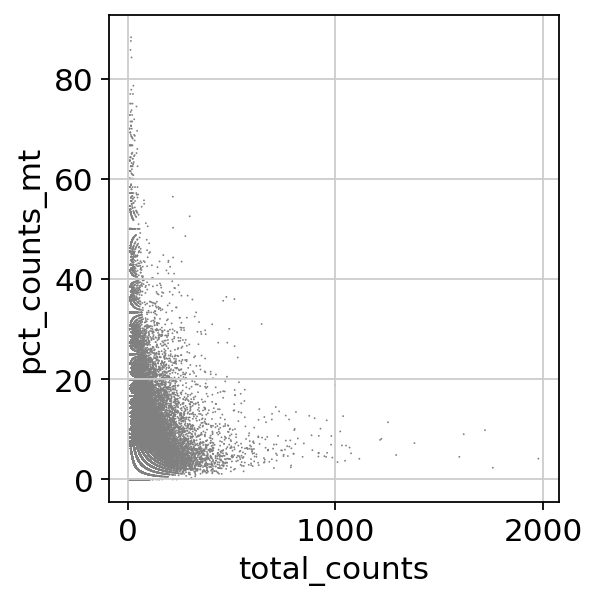

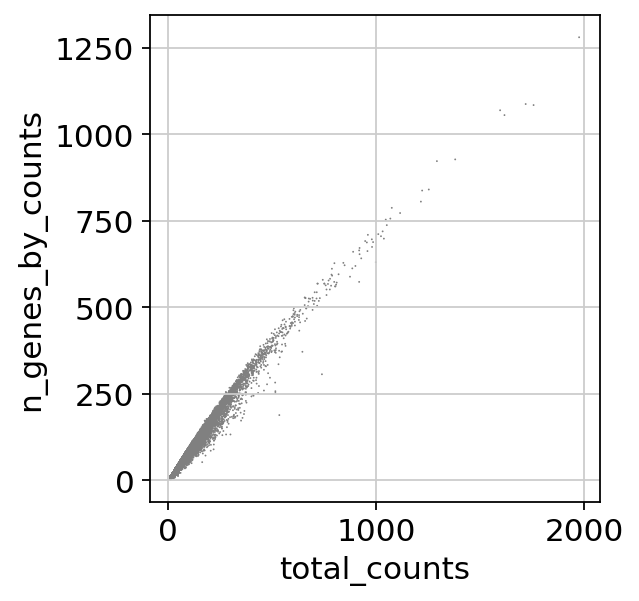

In [133]:
root_path = '/home/yzy/PUBDT/st/slideseq/h5ad/'
# puck = 'Puck_180611_2.h5ad'
puck = 'Puck_{0}.h5ad'.format(slideseq_puck_tissue_map['sagittal cortex 2w'][0])
adata = sc.read_h5ad(root_path+puck)

np.sum(adata.var_names.str.startswith("mt-"))

adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [134]:
adata_tmp = adata.copy()

In [111]:
adata = adata_tmp.copy()

In [135]:
adata

AnnData object with n_obs × n_vars = 43837 × 18931 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'

In [136]:
sc.pp.filter_cells(adata, min_genes=50)
sc.pp.filter_genes(adata, min_cells=3)

In [137]:
adata

AnnData object with n_obs × n_vars = 17413 × 14587 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    obsm: 'spatial'

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../anaconda3/envs/scaden/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


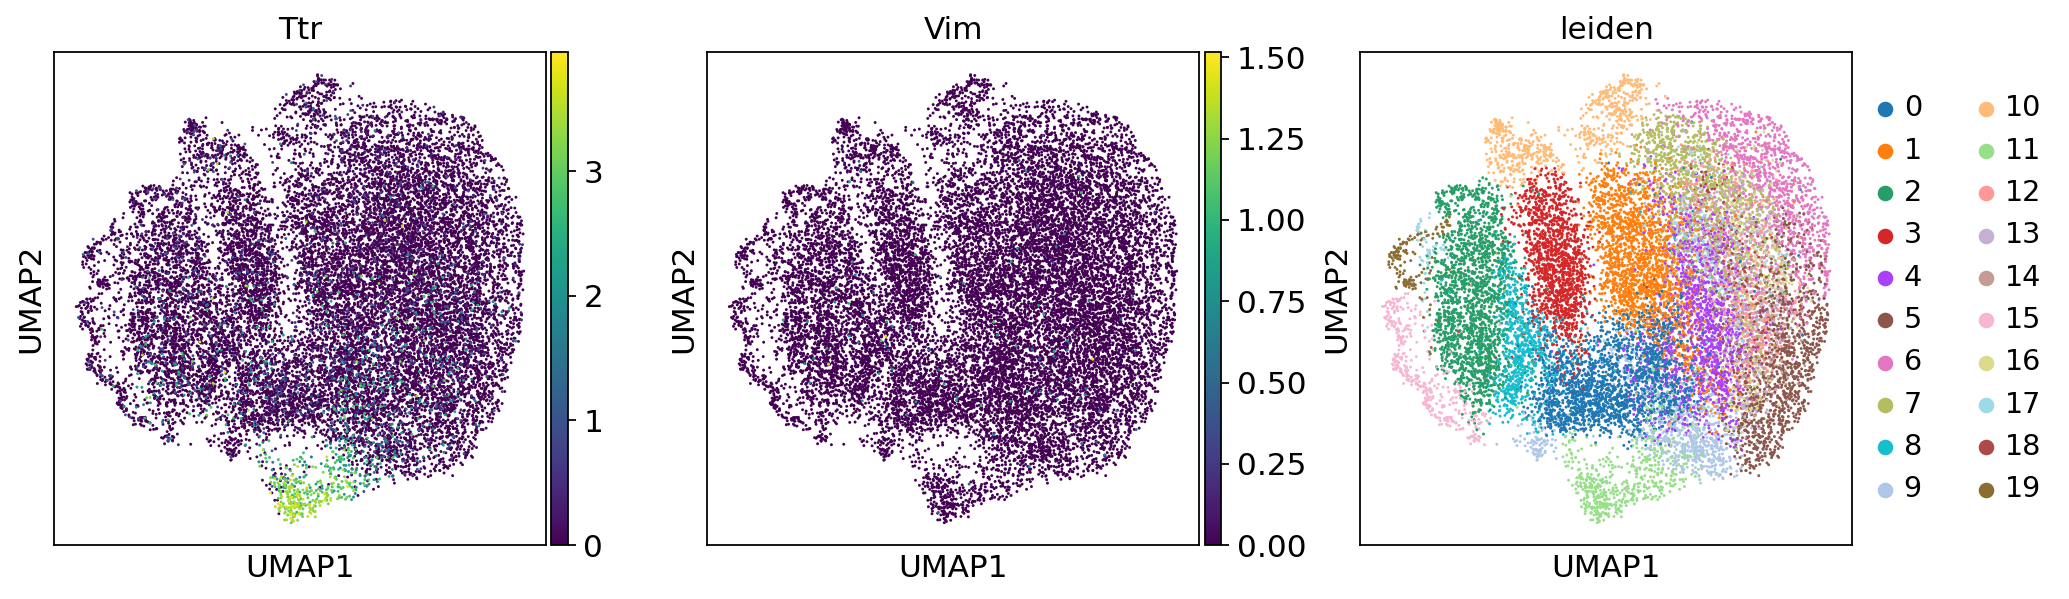

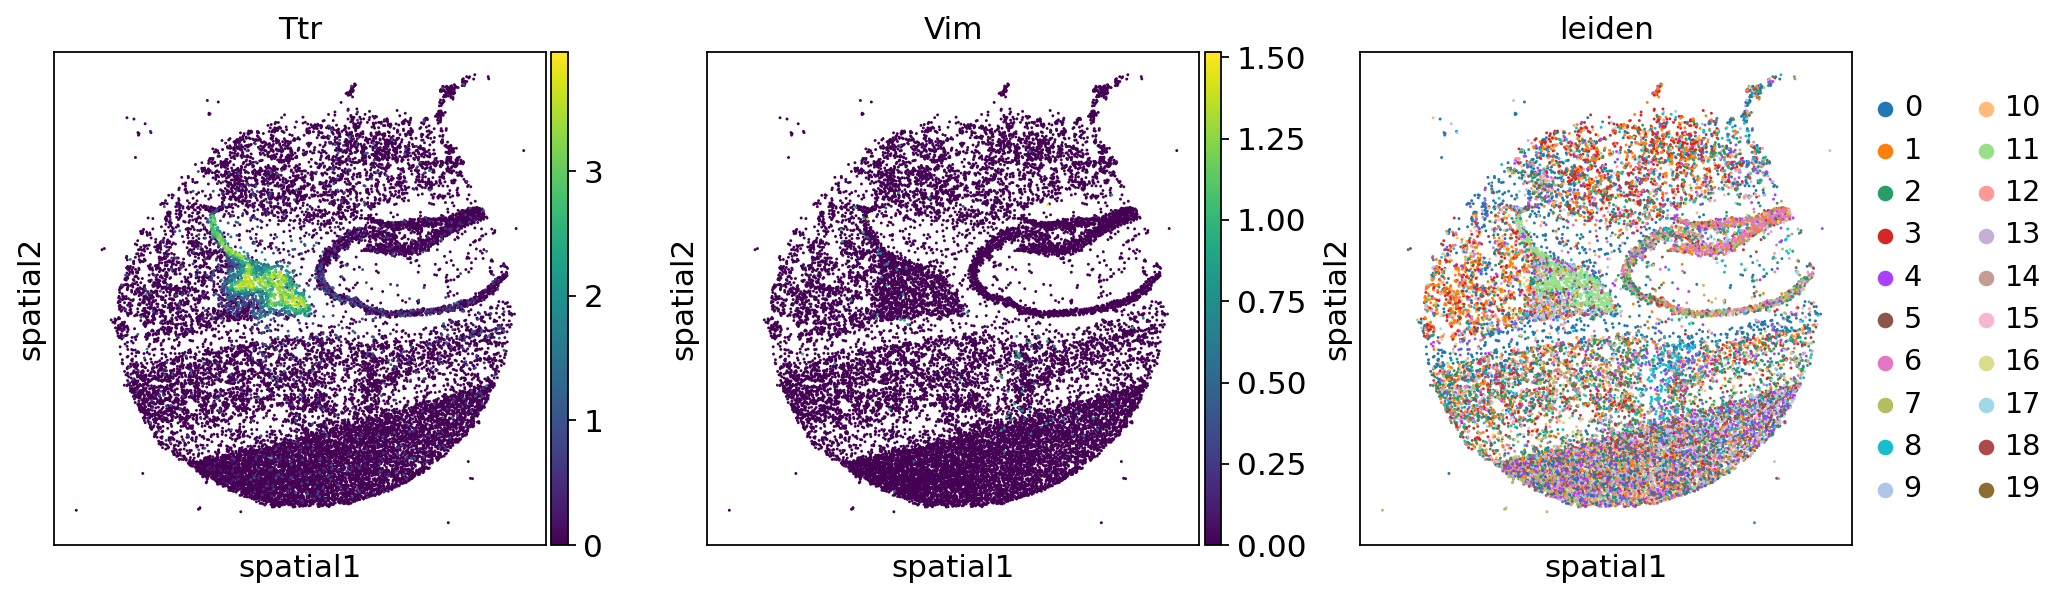

In [138]:


sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)
# sc.pp.highly_variable_genes(adata, n_top_genes=1000)



sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

# sc.pl.embedding(adata,basis='spatial',color=['clusters'])
sc.pl.umap(adata,color=['Ttr','Vim','leiden'])
sc.pl.embedding(adata,basis='spatial',color=['Ttr','Vim','leiden'])


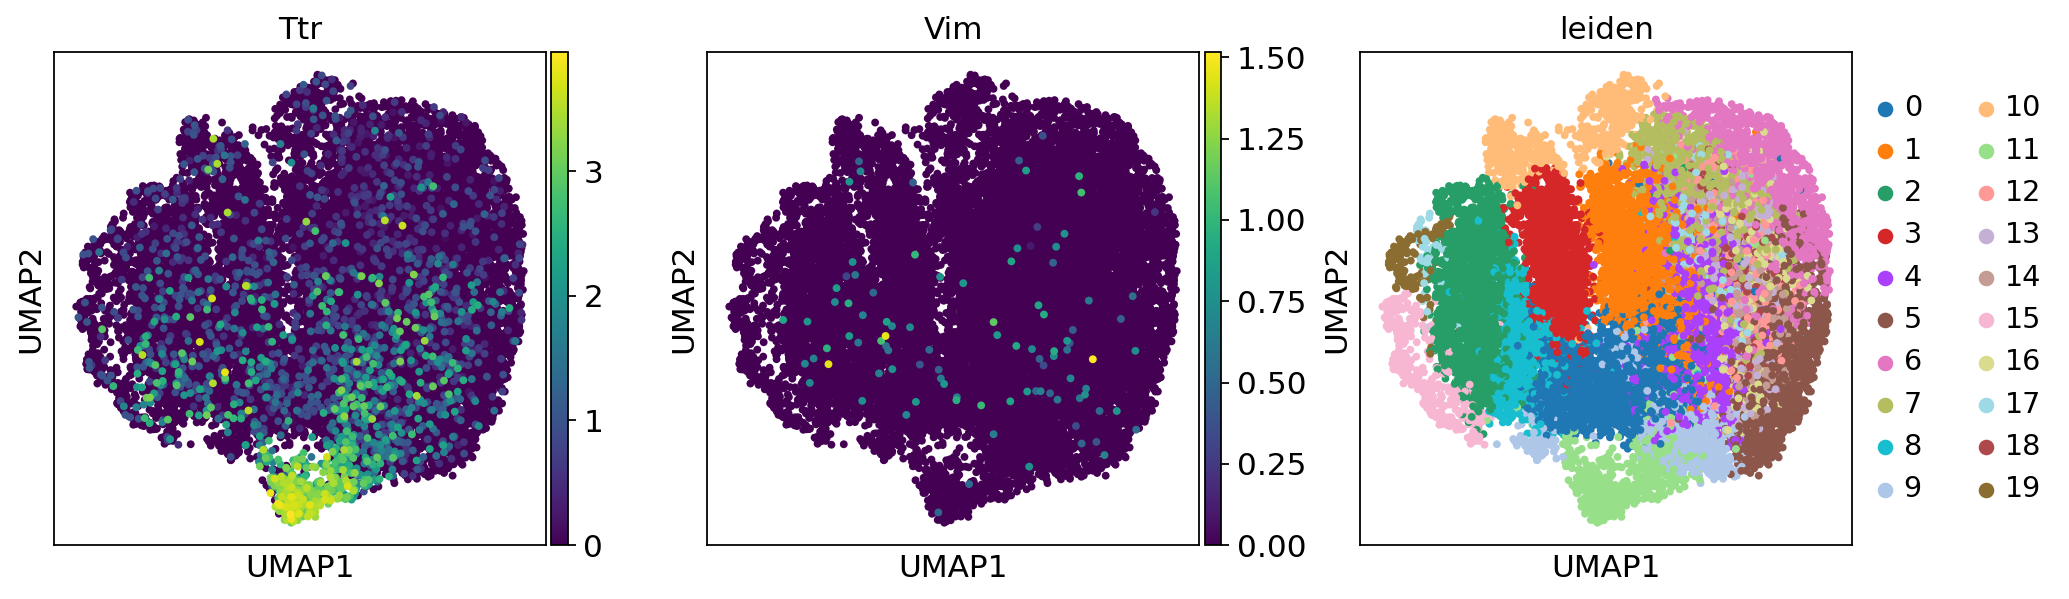

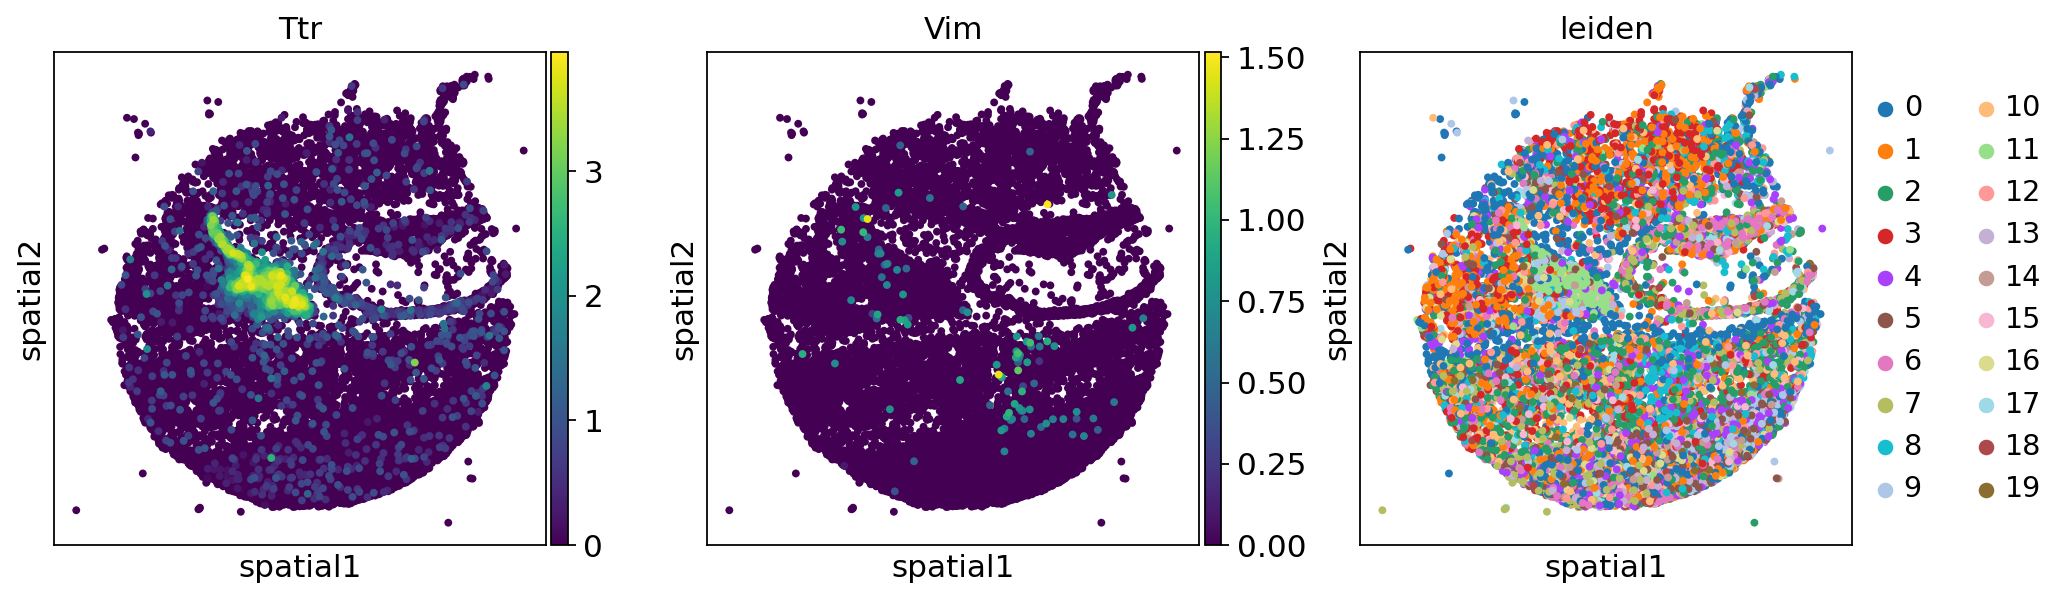

In [139]:
sc.pl.umap(adata,color=['Ttr','Vim','leiden'],s=50)
sc.pl.embedding(adata,basis='spatial',color=['Ttr','Vim','leiden'],s=50)